# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, [김진수](bigpycraft@gmail.com)</font></div>
<hr>

## <font color='brown'>과제. 오픈데이터 활용</font>

### Bike Sharing Demand 
>  
> - URL  : https://www.kaggle.com/c/bike-sharing-demand/
> - 개요 : 자전거 공유 시스템 임대수량 예측
> - Data : 2년간의 시간대별 자전거 임대 데이터

> Data Field 
> - datetime : hourly date + timestamp  
> - season :  1 = spring, 2 = summer, 3 = fall, 4 = winter 
> - holiday : whether the day is considered a holiday
> - workingday : whether the day is neither a weekend nor holiday
> - weather :
> <br> 1) Clear, Few clouds, Partly cloudy, Partly cloudy 
> <br> 2) Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
> <br> 3) Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
> <br> 4) Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
> - temp : temperature in Celsius
> - atemp : "feels like" temperature in Celsius
> - humidity : relative humidity
> - windspeed : wind speed
> - casual : number of non-registered user rentals initiated
> - registered : number of registered user rentals initiated
> - count : number of total rentals

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set()
# sns.set_style('whitegrid')
# sns.set_color_codes()
# current_palette = sns.color_palette()
# sns.palplot(current_palette)


# 1. 데이터 불러오기

In [2]:
# 데이터 불러오기
data = pd.read_csv('./data/bike_train.csv')
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


- datatime만 범주형, 나머지 변수는 실수/정수
- 행: 10886개, 컬럼 12개


In [5]:
data.head(10).isna()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
# Nan 데이터 유무 체크
data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

- null값은 없음

In [7]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


- 범주형 변수: season, holiday, workingday, weather

# 2. data 확인하기

In [14]:
data[::500]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
500,2011-02-03 23:00:00,1,0,1,1,8.20,11.365,47,7.0015,4,34,38
1000,2011-03-06 03:00:00,1,0,0,2,17.22,21.210,82,19.9995,2,9,11
1500,2011-04-08 09:00:00,2,0,1,2,14.76,17.425,76,12.9980,17,168,185
2000,2011-05-10 06:00:00,2,0,1,1,17.22,21.210,67,8.9981,9,103,112
2500,2011-06-12 02:00:00,2,0,0,1,26.24,28.790,89,16.9979,9,57,66
3000,2011-07-13 22:00:00,3,0,1,1,27.88,31.820,83,12.9980,48,136,184
3500,2011-08-15 18:00:00,3,0,1,1,28.70,32.575,65,12.9980,70,413,483
4000,2011-09-17 17:00:00,3,0,0,1,21.32,25.000,72,15.0013,141,218,359
4500,2011-10-19 14:00:00,4,0,1,3,22.14,25.760,94,11.0014,17,80,97


In [7]:
# casual + registered = count인가?
data['total'] = data['casual'] + data['registered']
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,total
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1


In [8]:
data.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,total
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,88


- casual + registered = total 임을 알 수 있음.

In [15]:
# holiday, workingday 정확히 분리하기

def holi_or_work(holiday, workingday):
    if holiday == 0:
        if workingday == 0:
            msg = '주말'
        else:
            msg = '평일'
    else:
        msg = '휴일'
    return msg

data['holi_or_work'] =list( map(lambda x, y: holi_or_work(x, y), data['holiday'], data['workingday']) )

In [16]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,holi_or_work
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,주말
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,주말
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,주말
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,주말
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,주말


In [17]:
holi_or_work =data['holi_or_work'].value_counts()
print(holi_or_work)

평일    7412
주말    3163
휴일     311
Name: holi_or_work, dtype: int64


In [18]:
sum(data['holi_or_work'].value_counts())

10886

In [26]:
from datetime import datetime

In [29]:
tmp = data.datetime[0]
print(type(tmp))
tmp

<class 'str'>


'2011-01-01 00:00:00'

In [ ]:
# nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S')

In [33]:
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y%m%d %H:%M:%S') 
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,holi_or_work
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,주말
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,주말
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,주말
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,주말
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,주말
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,주말
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,주말
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,주말
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,주말
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,주말


In [34]:
tmp = data.datetime[0]
print(type(tmp))
tmp

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Timestamp('2011-01-01 00:00:00')

In [35]:
data.datetime[0].year

2011

In [44]:
data.datetime[0].year

2011

In [50]:
data['dt_year'] = ' '

In [51]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,holi_or_work,dt_year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,주말,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,주말,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,주말,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,주말,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,주말,2011


In [52]:
data.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,holi_or_work,dt_year
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,평일,
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,평일,
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,평일,
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,평일,
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,평일,


In [57]:
for idx in range(len(data)):
    data.dt_year[idx] = data.datetime[idx].year
    # print(data.datetime[idx])

In [55]:
data.groupby(data['holi_or_work']).size()

holi_or_work
주말    3163
평일    7412
휴일     311
dtype: int64

In [82]:
data.groupby(data['dt_year']).size()

dt_year
2011    5422
2012    5464
dtype: int64

In [85]:
data.groupby(['dt_year', 'holi_or_work']).size()

dt_year  holi_or_work
2011     주말              1580
         평일              3698
         휴일               144
2012     주말              1583
         평일              3714
         휴일               167
dtype: int64

- 휴일,주말, 평일로 나누어 분석해야 겠음. (겹치지 않도록)

# 3. 가설 설정 밀 검증

### 1) 가설 1
> 평일에는 등록한 사람들이 많이 이용하고, 주말/휴일에는 등록하지 않은 사람들이 많이 이용할 것이다.

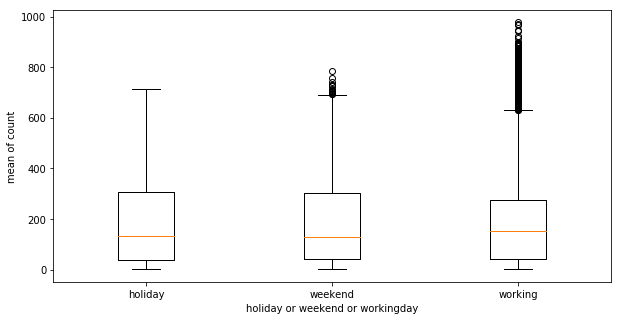

In [86]:
# 전체 이용자 수의 비교
s1 = data.loc[data['holi_or_work']== '휴일','count']
s2 = data.loc[data['holi_or_work']== '주말','count']
s3 = data.loc[data['holi_or_work']== '평일','count']

plt.figure(figsize = (10, 5))
plt.boxplot((s1,s2, s3))
plt.xlabel('holiday or weekend or workingday')
plt.ylabel('mean of count')
plt.xticks([1,2,3],('holiday','weekend','working'))
plt.show()

- 휴일, 주말, 평일의 전체 이용자 수는 비슷함.
- 휴일과 주말에 outlier가 많은 것은 날씨와 계절에 따른 영향일 것으로 생각됨

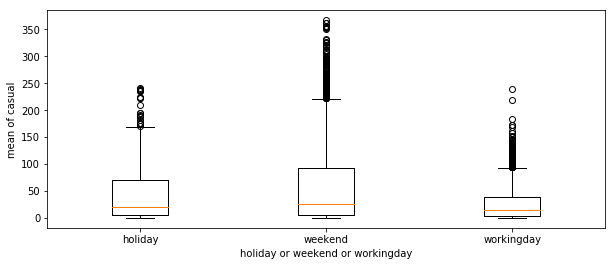

In [87]:
# 비등록자에 대한 비교
s1 = data.loc[data['holi_or_work'] == '주말', 'casual']
s2 = data.loc[data['holi_or_work'] == '휴일', 'casual']
s3 = data.loc[data['holi_or_work'] == '평일', 'casual']

plt.figure(figsize = (10, 4))
plt.boxplot((s2, s1, s3))
plt.xlabel('holiday or weekend or workingday')
plt.ylabel('mean of casual')
plt.xticks([1,2,3], ('holiday','weekend','workingday'))
plt.show()

- 비등록한 사람들은 주말 > 휴일> 평일 순으로 이용함.

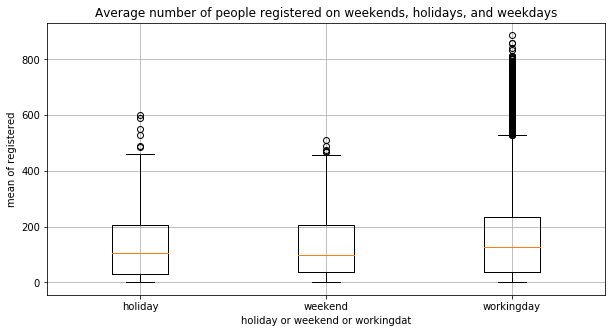

In [88]:
# 등록한 사람들에 대한 비교
s1 = data.loc[data['holi_or_work'] == '휴일', 'registered']
s2 = data.loc[data['holi_or_work'] == '주말', 'registered']
s3 = data.loc[data['holi_or_work'] == '평일', 'registered']

plt.figure(figsize = (10, 5))
plt.boxplot((s1, s2, s3))
plt.title('Average number of people registered on weekends, holidays, and weekdays')
plt.xlabel('holiday or weekend or workingdat')
plt.ylabel('mean of registered')
plt.xticks([1,2,3], ('holiday','weekend','workingday'))
plt.grid()
plt.show()

- 등록한 사람들은 평일> 휴일 = 주말로 나타남
- 예상대로 등록한 사람들은 평일에 많이 이용하고, 등록하지 않은 사람든 휴일/주말에 많이 이용하는 것을 볼 수 있음

## 2) 가설2
### 날씨가 좋은 봄, 가을에 사람들이 많이 공유 자전거를 이용할 것이다.

In [95]:
data['datetime'][0].date

<function Timestamp.date>

In [16]:
# datetime을 date, time으로 분리하기
data['date'] = data['datetime'].apply(lambda x: x.split()[0])
data['time'] = data['datetime'].apply(lambda x: x.split()[1])
data[['date','time']].head()

,date,time
0,2011-01-01,00:00:00
1,2011-01-01,01:00:00
2,2011-01-01,02:00:00
3,2011-01-01,03:00:00
4,2011-01-01,04:00:00


In [17]:
# 봄, 여름, 가을, 겨울 날짜 확인
data.loc[data['season'] == 1, 'date']  # 1.1 ~ 3.19
data.loc[data['season'] == 2, 'date']  # 4.1 ~ 9.19
data.loc[data['season'] == 3, 'date']  # 7.1~9.19
data.loc[data['season'] == 4, 'date']  # 10.1 ~ 12.19

4055     2011-10-01
4056     2011-10-01
4057     2011-10-01
4058     2011-10-01
4059     2011-10-01
            ...    
10881    2012-12-19
10882    2012-12-19
10883    2012-12-19
10884    2012-12-19
10885    2012-12-19
Name: date, Length: 2734, dtype: object

In [18]:
# 계절별, 날씨별 데이터 수 확인
data['season' ].value_counts()  # 거의 비숫
data['weather'].value_counts()  # 1>2>3>4 순 ( 4( heavy snow/rain) : 데이터 수 1개)

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

C:\Users\shiney\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\shiney\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


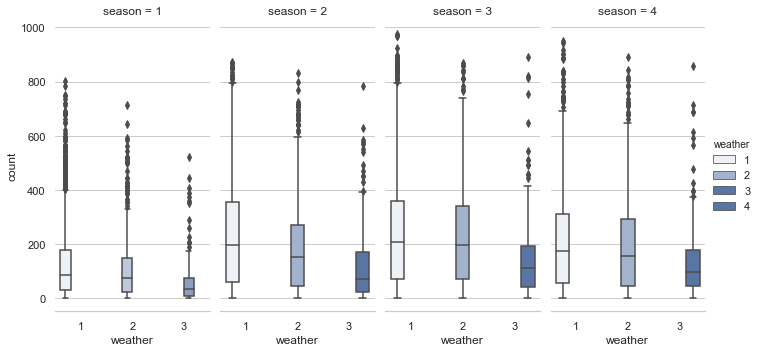

In [19]:
# 계절별 전체 이용자 수 plot 그리기
# data_season_weather =data[['seasno','weather','count']] 

g = sns.FacetGrid(data, col = 'season',height = 5, aspect = .5)
(g.map(sns.boxplot, 'weather', 'count', 'weather').despine(left = True).add_legend(title = 'weather'))
plt.show()

- 예상과 달리 봄보다는 여름, 가을 에 자전거를 많이 타는 것으로 나타남.
- 날씨가 4인 데이터는 1개 뿐이라, plot에는 표현되지 않음.
- 모든 계절에서 날씨가 좋을 때 많이 타는 것으로 나타남
- 워싱턴 DA의 계절별 기온, 습도, 바람 속도 등을 살펴보며 어떤 요소가 영향을 미치는지 알아봐야 겠음.

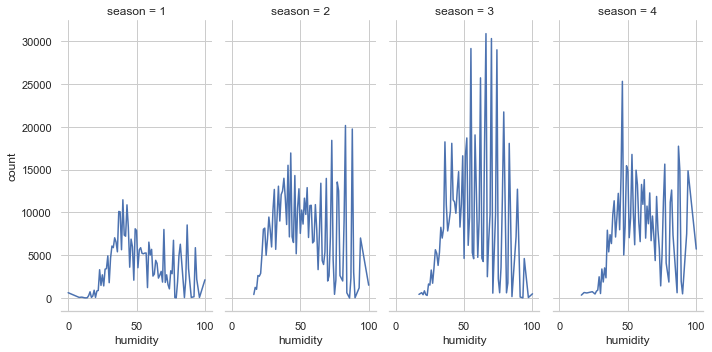

In [20]:
# 계절별 습도에 따른 전체 이용자 수의 함계
data_humidity = data.groupby(['season','humidity'], as_index = False)['count'].sum()

# plt.figure(figsize = (16, 8))
# plt.subplot(221)
# plt.plot(data_humidity[data_humidity.loc['season']==1, 'humidity'], 'name')
# plt.show()

g = sns.FacetGrid(data_humidity, col = 'season',height = 5, aspect = .5)
(g.map(sns.lineplot, 'humidity', 'count').despine(left = True))
plt.show()




- 습도가 극단적으로 낮을 때와 높을 때를 제외하고는 자전거를 많이 타고 있으며, 상관관계를 파악하기 어려움
- 날씨를 기준으로 plot을 그렸을 때와는 달리 가을에 가장 많이 타는 것으로 보임. plot을 잘못 그린 그린 것인지 살펴봐야겠음.

C:\Users\shiney\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


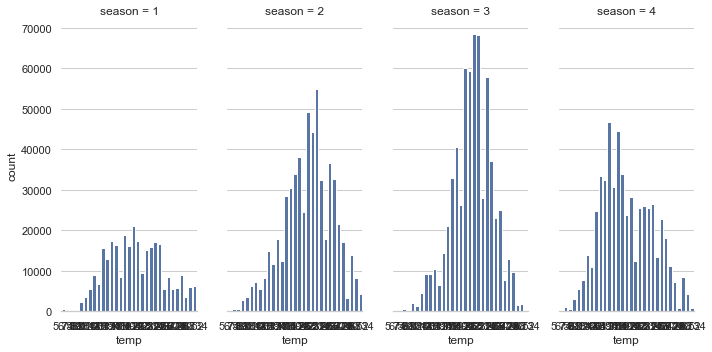

In [21]:
# 계절별 기온에 따른 전체 이용자 수의 함계
data_temp = data.groupby(['season','temp'], as_index = False)['count'].sum()

g = sns.FacetGrid(data_temp, col = 'season',height = 5, aspect = .5)
(g.map(sns.barplot, 'temp', 'count').despine(left = True))
plt.show()


- 계절에 따른 온도는  봄, 가을에 많이 타는 것 같음.
- 여름, 가을의 이용율(plot의 면적)이 거의 비슷할 것을 보임

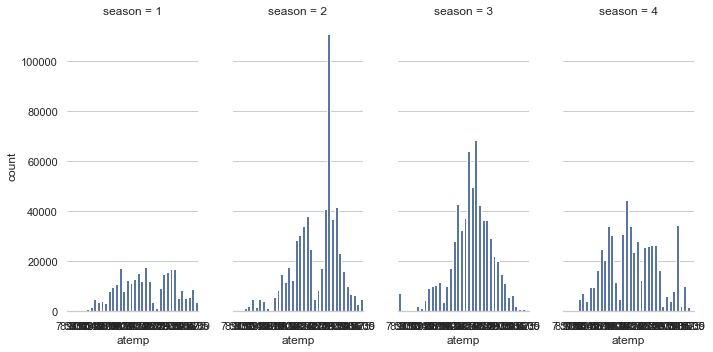

In [22]:
# 계절별 체감온도에 따른 전체 이용자 수의 함계
data_temp = data.groupby(['season','atemp'], as_index = False)['count'].sum()

g = sns.FacetGrid(data_temp, col = 'season',height = 5, aspect = .5)
(g.map(sns.barplot, 'atemp', 'count').despine(left = True))
plt.show()

- 체감 온도에 따른 계절별 변화는 위의 그래프에서 살펴본 것과 같이 여름, 가을에 많이 타지만, 여름에 체감기온 32때 특히 많이 자전거를 이용하는 것을 볼 수 있었음.
- 체감기온 32도에 영향을 미치는 요인에 대해 좀 더 분석할 필요가 있음.

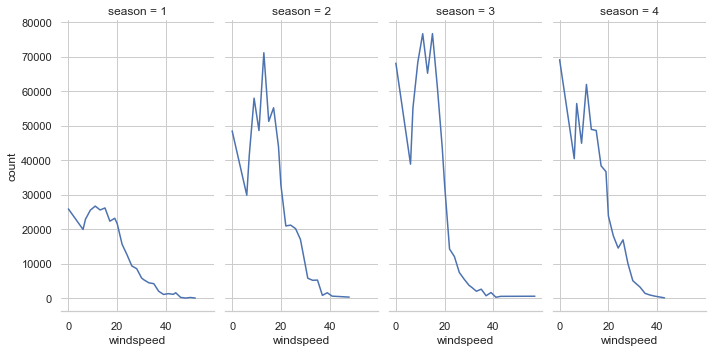

In [23]:
# 계절별 바람 속도에 따른 전체 이용자 수의 함계
data_temp = data.groupby(['season','windspeed'], as_index = False)['count'].sum()

g = sns.FacetGrid(data_temp, col = 'season',height = 5, aspect = .5)
(g.map(sns.lineplot, 'windspeed', 'count').despine(left = True))
plt.show()

- 바람의 속도와 이용자수의 관계가 음의 상관관계를 보이나, 4계적 모두 처음에는 높았다가 낮아졌다가 다시 높아지고 낮아지는 양상을 보임.
- 어떤 원인이 있는지 분석하면 좋을 것 같음.

## 3) 가설3

### 출퇴근 시간에는 등록한 사람들이 많이 이용할 것이다.

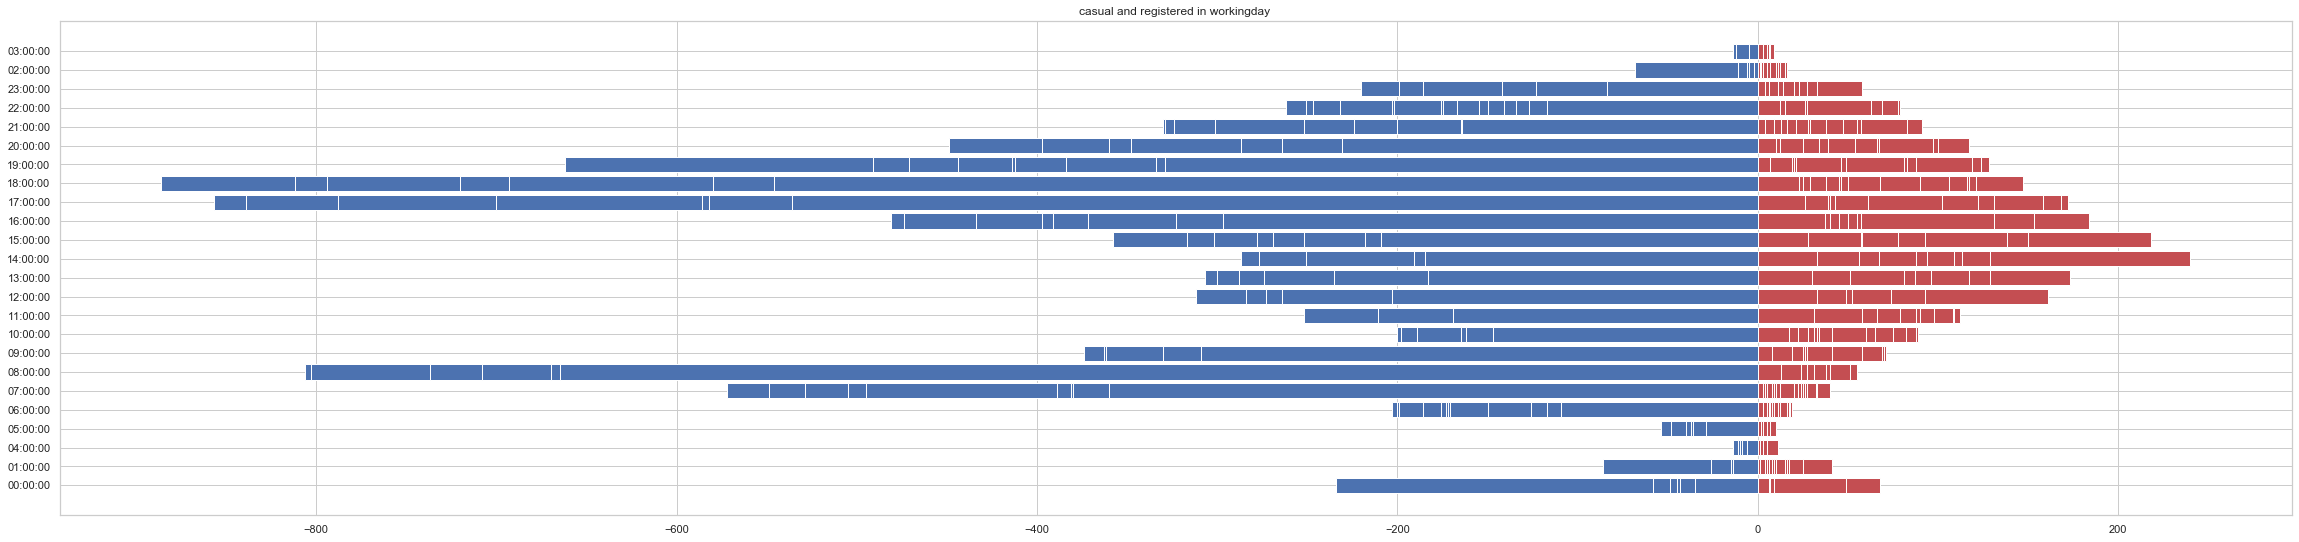

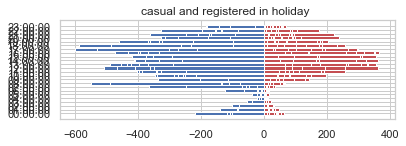

In [24]:
data_workingday = data[data['workingday']==1]
data_holiday    = data[data['workingday']==0]

plt.figure(figsize = (40,20))
# 평일 
plt.subplot(211)
plt.barh(data_workingday['time'],  data_workingday['casual']    , label = 'casual'    , color = 'r')
plt.barh(data_workingday['time'], -data_workingday['registered'], label = 'registered', color = 'b')
plt.title("casual and registered in workingday ")
plt.show()

#휴일
plt.subplot(212)
plt.barh(data_holiday['time'], data_holiday['casual'], label = 'casual', color = 'r')
plt.barh(data_holiday['time'], -data_holiday['registered'], label = 'registered', color = 'b')
plt.title("casual and registered in holiday ")
plt.show()

- 등록하지 않은 사람들은 평일,  휴일모두 출퇴근 시간보다는 낮시간에 많이 이용함.
- 등록한 사람들은 평일에는 출퇴근 시간에, 휴일에는 낮시간에 많이 이용함.

## 4. 분석 결과 및 활용

> 1) 공유 자전거 서비스 개선1
> - 평일 출퇴근 시간에 많이 이용하는 등록된 사람들의 비중이 높음.
> - 데이터를 추가로 수집한다면, 그들의 빌린 대여소와 반납한 대여소에 일정한 패턴이 있을 것으로 판단됨.
> - 대여소 위치 정보와 시간 정보를 활용하여,  자전거를 공급하여, 자전거를 이용하고자 할 때 자전거의 부재로 이용이 못하는 일이 없도록 서비스를 개선하면 좋을 것 같음.


> 2) 공유 자전거 서비스 개선2
> - 평소 패턴과는 다르게 자전거를 대여, 반남하는 경우, 시간, 위치 정보를 활용하여 고장난 자전거 여부를 파악하고 신속하게 수리를 진행함.
> - 대여 후 1분 이내 반납하거나, 근처 대여소에서 자전거를 교체한 경우 등에 대한 데이터 수집이 필요함. 

> 3) 공유 자전거 서비스 개선3
> - 주말, 휴일에 낮시간 동안에 비등록한 사람들이 많이 이용함.
> - 주말, 휴일에 이용하는 비등록한 이용자가 많이 찾는 위치(공원, 자전거 전용도로 등)를 파악하여, 낮 시간동안에만 이용할 수 있는 정기권 제도를 저렴하게 만들어 판매한다면, 등록하게 되고, 지속적인 이용이 가능하도록 만들 수 있을 것으로 판단됨. 


<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>